<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/Week_3_Quiz_2_Widi_Afandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 - Quiz 2**

Nama: Widi Afandi

Institusi: Institut Teknologi Telkom Purwokerto

## **Preparing Dataset**

Import all datasets and merge them into one

In [19]:
# impor library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset customers
customers = pd.read_csv('Customer.csv')
# show dataset
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [3]:
# dataset transactions
transactions = pd.read_csv('Transactions.csv')
# show dataset
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
# dataset prod_cat_info
prod_cat_info = pd.read_csv('prod_cat_info.csv')
# show dataset
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
# merge transactions and customers datasets
transaction_customer = pd.merge(
    transactions,
    customers,
    left_on = 'cust_id',
    right_on = 'customer_Id'
    )
# merge transactions, customers, and prod_cat_info datasets
transaction_customer_prod = pd.merge(
    transaction_customer,
    prod_cat_info,
    left_on = ['prod_subcat_code', 'prod_cat_code'],
    right_on= ['prod_cat_code', 'prod_cat_code']
    )
# show merged dataset
transaction_customer_prod.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women


## 1. Berapakah jumlah data yang tersedia

**Jawab:**



In [6]:
# count data with len
sum_data = len(transaction_customer_prod)
# show result
print("Jumlah data yang tersedia adalah", sum_data)


Jumlah data yang tersedia adalah 5005


## 2. Deskripsikan statistika data sederhana (mean, max, min,..) menggunakan fungsi pandas
**Jawab:**

In [7]:
transaction_customer_prod.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,5.005000e+03,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,5.064611e+10,271019.448152,2.192807,2.192807,2.372627,613.441359,251.936517,2047.221688,271019.448152,5.609590,2.600400
std,2.894192e+10,2433.668141,1.468354,1.468354,2.386766,636.237310,190.735382,2620.708991,2433.668141,2.860224,1.355983
min,1.086136e+07,266794.000000,1.000000,1.000000,-5.000000,-1488.000000,7.455000,-8154.900000,266794.000000,1.000000,1.000000
25%,2.625969e+10,268964.000000,1.000000,1.000000,1.000000,293.000000,95.130000,703.885000,268964.000000,3.000000,1.000000
50%,5.008910e+10,270992.000000,1.000000,1.000000,3.000000,669.000000,202.020000,1712.750000,270992.000000,6.000000,3.000000
75%,7.614785e+10,273170.000000,4.000000,4.000000,4.000000,1102.000000,367.605000,3547.050000,273170.000000,8.000000,4.000000
max,9.998675e+10,275261.000000,4.000000,4.000000,5.000000,1499.000000,786.975000,8281.975000,275261.000000,10.000000,4.000000


## 3. Bantulah perusahaan untuk bisa menentukan berapa banyak pelanggan berdasarkan jenis kelamin (men vs women)
**Jawab:**

M    2587
F    2412
Name: Gender, dtype: int64


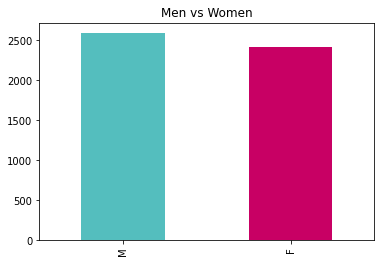

In [8]:
# count values in Gender field
cust_by_gender = transaction_customer_prod['Gender'].value_counts()
# show res
print(cust_by_gender)
# visualization
cust_by_gender.plot(kind="bar",
                    title='Men vs Women',
                    color=['#54bebe',
                           '#c80064']
                    )
plt.show()

## 4. Bantulah perusahaan untuk bisa menentukan product kategori (prod_cat) mana saja yang paling banyak diminati laki-laki 
**Jawab:**

Berdasarkan hasil visualisasi di bawah,  produk Clothing paling di minati laki-laki

In [9]:
# groupby dataset by prod_cat and gender
by_prod_cat = transaction_customer_prod.groupby(['prod_cat', 'Gender']).count()
# function order by prod and gender
def by_prod_gender(gender, i, j):
  # make new dataframe from groupby result
  gender_prod = pd.DataFrame(
      [[gender, 'Bags', by_prod_cat['transaction_id'][i]],
      [gender, 'Clothing', by_prod_cat['transaction_id'][j]]],
      columns = ['gender', 'prod', 'val'])
  # show data
  print(gender_prod, '\n')
  # visualization
  plt.bar(gender_prod['prod'],
          gender_prod['val'],
          color = ['#019267', '#FFD365'],
          width = 0.4)
  plt.title('Produk yang Diminati '+gender)
  plt.show()

      gender      prod   val
0  Laki-Laki      Bags   970
1  Laki-Laki  Clothing  1617 



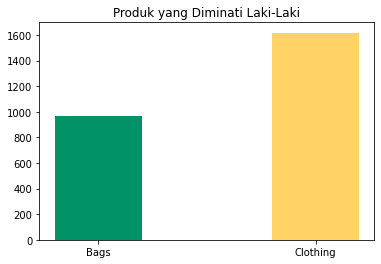

In [10]:
# call function for mens
by_prod_gender('Laki-Laki', 1, 3)

## 5. Bantulah perusahaan untuk bisa menentukan product kategori (prod_cat) mana saja yang paling banyak diminati perempuan.
**Jawab:**

Berdasarkan hasil visualisasi di bawah,  produk Clothing paling di minati perempuan

      gender      prod   val
0  Perempuan      Bags  1020
1  Perempuan  Clothing  1392 



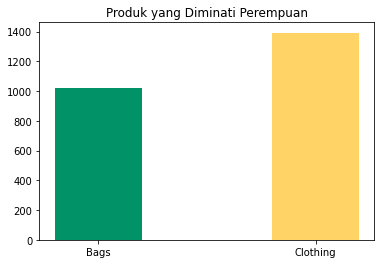

In [11]:
# call function for woman
by_prod_gender('Perempuan', 0, 2)

## 6. Mana y store type yang paling banyak diakses oleh pelanggan untuk mencari produk di perusahaan retail ini.
**Jawab:**

Store type yang paling banyak diakses oleh pelanggan secara umum adalah e Shop, MBR, Flagship Store, dan terakhir TeleShop

prod_cat        Bags  Clothing
Store_type                    
Flagship store   392       600
MBR              428       678
TeleShop         394       546
e-Shop           776      1191 



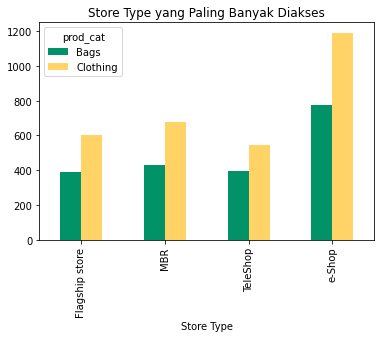

In [12]:
# groupby dataset by Store_type and prod_cat
by_store_type = transaction_customer_prod.groupby(['Store_type', 'prod_cat']).count()
# show data
print(by_store_type.unstack()['transaction_id'], '\n')
# visualization
by_store_type.unstack()['transaction_id'].plot(
    kind = 'bar', # kind graph
    color = ['#019267', '#FFD365'], # color bar
    xlabel = 'Store Type', # label for x axis
    title = 'Store Type yang Paling Banyak Diakses' # title graph
    )
plt.show()

## 7. Mana y bulan dengan penjualan tertinggi dan terendah selama satu tahun.
**Jawab:**

Pada bulan ke 10 penjualan Clothing tertinggi dan pada bulan ke 6 penjualan Bags tertinggi

month  prod_cat
1      Bags        164
       Clothing    309
2      Bags        158
       Clothing    222
3      Bags        180
       Clothing    252
4      Bags        168
       Clothing    201
5      Bags        164
       Clothing    243
6      Bags        182
       Clothing    225
7      Bags        176
       Clothing    246
8      Bags        156
       Clothing    255
9      Bags        170
       Clothing    252
10     Bags        154
       Clothing    324
11     Bags        168
       Clothing    270
12     Bags        150
       Clothing    216
Name: transaction_id, dtype: int64 



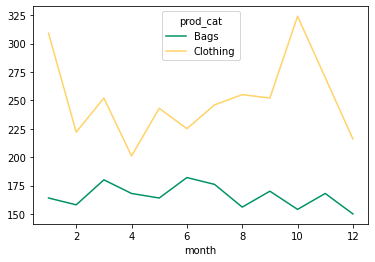

In [14]:
# get month from tran_date
transaction_customer_prod['month'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).month
# group by month and prod_cct
by_date = transaction_customer_prod.groupby(by = ["month", "prod_cat"]).count()
# show data
print(by_date["transaction_id"], '\n')
# visualization
by_date["transaction_id"].unstack().plot(color = ['#019267', '#FFD365'])
plt.show()

## 8. Penjualan per tahun
**Jawab:**

Penjualan mengalami kenaikan dari tahun 2011 - 2013 tetapi penjualan mengalami penurunan yang sangat tajam pada tahun 2014

year  prod_cat
2011  Bags         598
      Clothing     819
2012  Bags         672
      Clothing     963
2013  Bags         628
      Clothing    1065
2014  Bags          92
      Clothing     168
Name: transaction_id, dtype: int64 



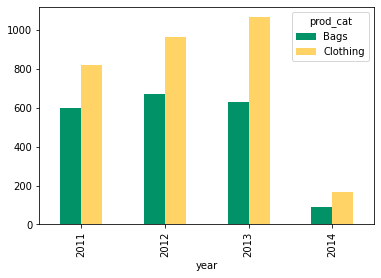

In [18]:
# get year from tran_date
transaction_customer_prod['year'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).year
# group by year and prod_cct
by_year = transaction_customer_prod.groupby(by = ["year", "prod_cat"]).count()
# show data
print(by_year["transaction_id"], '\n')
# visualization
by_year["transaction_id"].unstack().plot(color = ['#019267', '#FFD365'], kind = 'bar')
plt.show()

## 9. Korelasi antar variabel menggunakan heatmap 
**Jawab :**

Hubungan antar variabel memiliki korelasi yang sangat rendah terhadap variabel lain

                   transaction_id   cust_id  prod_subcat_code  prod_cat_code  \
transaction_id           1.000000  0.009927         -0.023458      -0.023458   
cust_id                  0.009927  1.000000         -0.049545      -0.049545   
prod_subcat_code        -0.023458 -0.049545          1.000000       1.000000   
prod_cat_code           -0.023458 -0.049545          1.000000       1.000000   
Qty                     -0.035602  0.000996         -0.006420      -0.006420   
Rate                    -0.023790 -0.007162         -0.009290      -0.009290   
Tax                     -0.017917  0.015770         -0.008062      -0.008062   
total_amt               -0.032970  0.003897         -0.011539      -0.011539   
customer_Id              0.009927  1.000000         -0.049545      -0.049545   
city_code                0.011605 -0.004468          0.019544       0.019544   
prod_sub_cat_code        0.001411  0.002981         -0.060159      -0.060159   
month                    0.006414  0.037

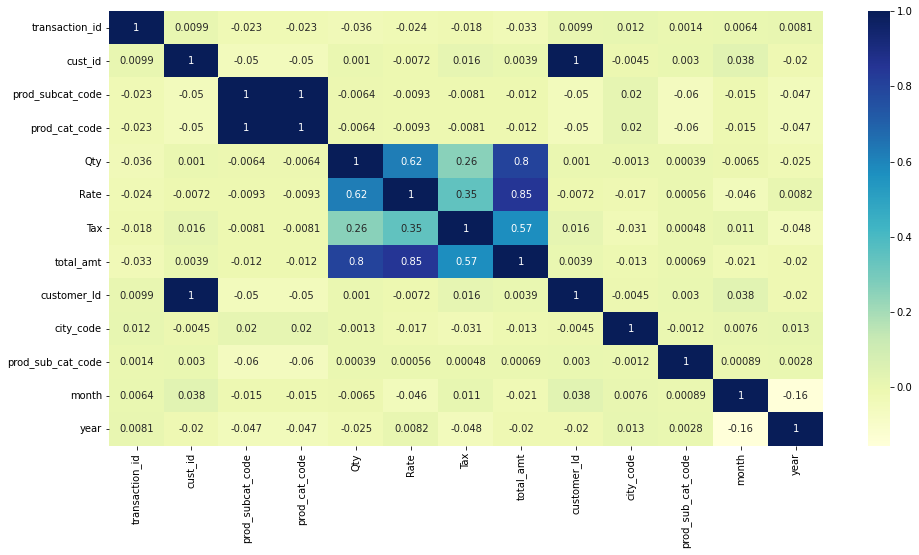

In [20]:
plt.rcParams['figure.figsize'] = (16,8)

print(transaction_customer_prod.corr())
dataplot = sns.heatmap(transaction_customer_prod.corr(), cmap="YlGnBu", annot=True)